In [30]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from os.path import expanduser
home = expanduser('~')
import warnings
warnings.filterwarnings("ignore")

### Settings
ITERS_1 = [248, 248.5, 249, 250, 252, 254, 256]
ITERS_2 = ['P4nmm', 'Pba2', 'P2c']
DOPING_LABELS = ITERS_1
YLIMS = [[-1, 1]]*10
# XLIMS = [[0, 5]]*10
FIG_SIZE = [7, 4]
PREFIX = '/mnt/c/Users/kyledmiller/GoogleDrive/data/BaCoS2/nelect-estruc'

# bands = []

def plot_bs_dos(loc, label):
    vbands = BSVasprun(loc + f'/vasprun-bands-{label}.xml',
                           parse_projected_eigen=True)
    vdos   = Vasprun(loc + f'/vasprun-dos-{label}.xml', 
                       parse_projected_eigen=True)

    bs = vbands.get_band_structure(kpoints_filename="KPOINTS.bands",line_mode=True)
    dos = vdos.complete_dos
    plt = BSDOSPlotter(bs_legend=None, dos_legend=None, 
                       fig_size=FIG_SIZE, cb_energy_range=YLIMS[i][1],
                       vb_energy_range=abs(YLIMS[i][0]), rgb_legend=False)
    plot = plt.get_plot(bs, dos)
    fig = plot.gcf()
    
    ### More formatting
    fig = plot.gcf()
    bs_ax, dos_ax = fig.get_axes() 
    bs_ax.xaxis.label.set_visible(False)
    bs_ax.set_ylabel('$E-E_F$ (eV)')
#     for line in bs_ax.collections:
#         line.set_color('dimgrey')
    dos_ax.set_xlabel('States / eV')
    dos_ax.set_xlim((-45,45))
    bs_ax.set_xlim((0,2.301))
#     plot.axhline(y=0, color='k', linestyle='-', linewidth=2)
    plot.sca(bs_ax)
#     plot.axhline(y=0, color='k', linestyle='-', linewidth=2)
    bs_ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#         bs_ax.set_ylabel('Frequencies (THz)', family='Helvetica')
    for tick in bs_ax.get_xticklabels():
        tick.set_fontname('DejaVu Sans')
    for tick in bs_ax.get_yticklabels():
        tick.set_fontname('DejaVu Sans')
    for ax in [bs_ax, dos_ax]:
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
#     t = plot.text(0.95, 0.02, f"{label}", horizontalalignment='right', 
#                   verticalalignment='bottom', transform=plot.gca().transAxes, 
#                   fontsize=18, color='grey')
#     t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='grey'))
#         bands.append(bs)

    plot.show()
#         plot.savefig(f"elec_bs_dos-vec-{label}.pdf", img_format='pdf', bbox_inches='tight')
    fig.savefig(f"elec_bs_dos-{label}.png", img_format='png', bbox_inches='tight', dpi=300)

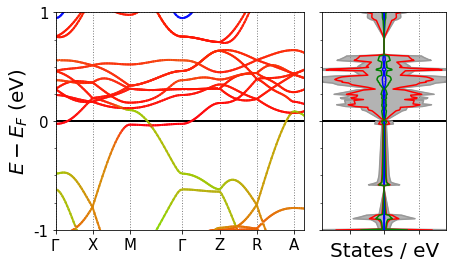

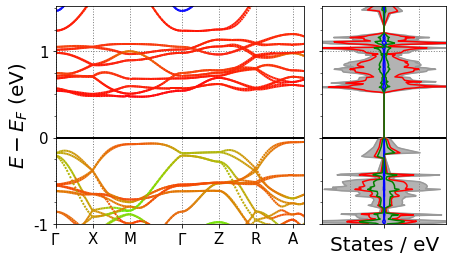

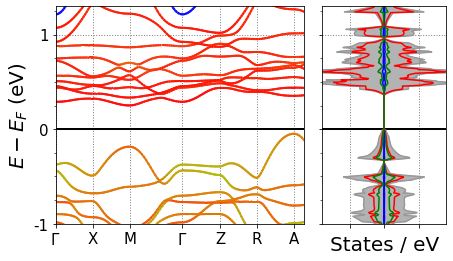

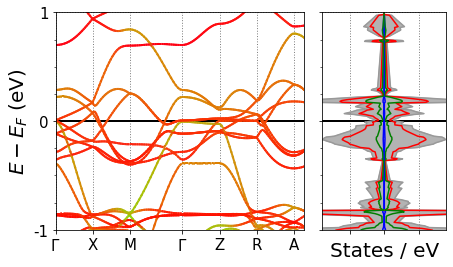

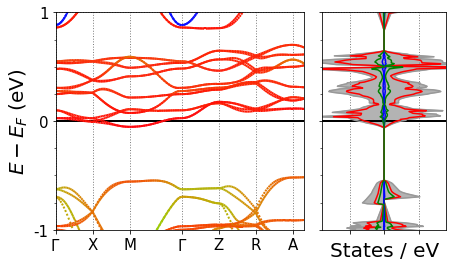

In [ ]:
for i, iter1 in enumerate(ITERS_1):
    for j, iter2 in enumerate(ITERS_2):
        label = f'exp_{iter2}_e{iter1}'
        plot_bs_dos(PREFIX, label)

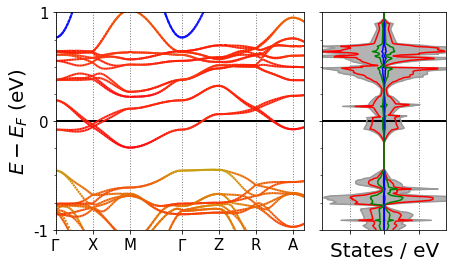

In [31]:
label = f'exp_Pba2_e249.5'
plot_bs_dos(PREFIX, label)